In [655]:

%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [656]:

from docutils.nodes import target
from scipy.stats import lognorm
from statsmodels.iolib.summary import summary

import os
from pathlib import Path
from unicodedata import category

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import duckdb
import statistics
import pandas as pd
import numpy as np
import functools
from IPython.core.pylabtools import figsize
from matplotlib.lines import lineStyles
from matplotlib.pyplot import xlabel, tight_layout
import os

In [657]:
fontManager.get_font_names()

['Srisakdi',
 'Chalkboard SE',
 'Noto Sans Khojki',
 'Noto Sans Mahajani',
 'Apple Chancery',
 'BIZ UDMincho',
 'DejaVu Sans Mono',
 'Noto Sans Mongolian',
 'Noto Sans New Tai Lue',
 'Wingdings',
 'Noto Sans Limbu',
 'Sama Devanagari',
 'Times',
 'Apple Symbols',
 'Mukta Malar',
 'Noto Sans Modi',
 'Hei',
 'BM Dohyeon',
 'Noto Serif Balinese',
 'Maku',
 'Diwan Kufi',
 'Tiro Devanagari Sanskrit',
 'Krub',
 '.SF Arabic',
 'Arial Unicode MS',
 'Noto Sans Myanmar',
 'Jaini Purva',
 'Noto Sans Syriac',
 'Herculanum',
 'October Tamil',
 'Lantinghei SC',
 'Sinhala Sangam MN',
 'Apple LiGothic',
 'Baloo Bhaina 2',
 'Noto Sans Linear A',
 'STIXSizeOneSym',
 'Noto Sans Carian',
 '.SF Arabic Rounded',
 'Noto Sans Inscriptional Parthian',
 'Bodoni 72 Oldstyle',
 'Georgia',
 'Noto Sans Marchen',
 'cmex10',
 'Noto Sans Hanifi Rohingya',
 'Avenir Next',
 'LingWai SC',
 '.SF Hebrew',
 'Big Caslon',
 'Geneva',
 'Arial Hebrew',
 'Gujarati MT',
 'STIXSizeTwoSym',
 'Kannada Sangam MN',
 'Noto Sans Pahawh 

In [658]:
import matplotlib
from matplotlib.font_manager import fontManager
matplotlib.rc('font',family = ['Times New Roman','Apple LiGothic'])

group_translate = {
    0:'控制組',
    1:'全簡單',
    2:'先易後難',
    3:'先難後易'
}

In [659]:

os.getcwd()
df_question = pd.read_parquet("../data/raw/experiment-2025-q1/ntuecon_experiment_250525/question_structure.parquet")

#conn = duckdb.connect("./data/raw/experiment-2025-q1/ntuecon_experiment_250525/target_book_volume_log.parquet")
df_book_vol = pd.read_parquet(
    "../data/raw/experiment-2025-q1/ntuecon_experiment_250603/target_book_volume_log_2025-06-03.parquet")

#conn = duckdb.connect("./data/raw/experiment-2025-q1/ntuecon_experiment_250525/target_user_answer_log.parquet")
df_user_ans = pd.read_parquet(
    "../data/raw/experiment-2025-q1/ntuecon_experiment_250603/target_user_answer_log_2025-06-03.parquet")

#conn = duckdb.connect("./data/raw/experiment-2025-q1/ntuecon_experiment_250525/target_user_info.parquet")
df_user_info = pd.read_parquet(
    "../data/raw/experiment-2025-q1/ntuecon_experiment_250603/target_user_info_2025-06-03.parquet")

df_question = pd.read_parquet(
    "/Users/eric/Documents/SchoolCourses/PaGamO/data/raw/experiment-2025-q1/ntuecon_experiment_250525/question_structure.parquet")
df_user_ans_05 = pd.read_parquet(
    "/Users/eric/Documents/SchoolCourses/PaGamO/data/raw/experiment-2025-q1/ntuecon_experiment_250525/target_user_answer_log.parquet")
df_user_info_05 = pd.read_parquet(
    '/Users/eric/Documents/SchoolCourses/PaGamO/data/raw/experiment-2025-q1/ntuecon_experiment_250603/target_user_answer_log_2025-06-03.parquet')
daily_stat = pd.read_parquet(
    '/Users/eric/Documents/SchoolCourses/PaGamO/data/raw/experiment-2025-q1/ntuecon_experiment_250603/target_gc_daily_stat_2025-06-03.parquet')
course = pd.read_parquet(
    "/Users/eric/Documents/SchoolCourses/PaGamO/data/raw/experiment-2025-q1/ntuecon_experiment_250603/target_gc_course_2025-06-03.parquet")

In [660]:
df_question[df_question['section_name'] == '3 容積'].head()

,answer,status,difficulty_level,publisher,subject_name,book_volume_name,book_volume_year,book_volume_semester,book_volume_grade,section_name,book_volume_id,question_id,section_id
10628,"[""D""]",released,1,康軒國小,數學,五下110,110,0,5,3 容積,1577873556171879904,8843215842280983133,-8628266867164968942
13922,"[""C""]",released,3,適翰國小(翰林版),數學,五下110,110,0,5,3 容積,-1036127081119423326,2206679743414081510,-2508402905005518623
15407,"[""A""]",released,2,康軒國小,數學,五下112,112,0,<NA>,3 容積,-4362731524008539478,9143362104705554525,-4982966045511578907
19496,"[""A""]",released,3,康軒國小,數學,五下113,113,0,<NA>,3 容積,6758213404002672111,-1533629239792391638,145845299402454255
22846,"[""C""]",released,2,康軒國小,數學,五下108,108,0,5,3 容積,2077283706398149578,-2375751679033849825,-8178391221860011447


In [661]:


testdff = pd.read_json("/Users/eric/Documents/SchoolCourses/PaGamO/data/processed/session_data_new.json")
testdff.info()
testdff['is_homo'] = testdff.section_id.apply(lambda x: all(xi == x[0] for xi in x))
testdff.head()


<class 'pandas.core.frame.DataFrame'>
Index: 56336 entries, (-9220875092377949261, 5420362116578998711, 1) to (9223087356083948458, 8730877631531542123, 1)
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   user_id               56336 non-null  int64         
 1   gamecharacter_id      56336 non-null  int64         
 2   session_id            56336 non-null  int64         
 3   is_correct            56336 non-null  object        
 4   difficulty_level      56336 non-null  object        
 5   experiment_index      56336 non-null  object        
 6   question_id           56336 non-null  object        
 7   subject_name          56336 non-null  object        
 8   section_id            56336 non-null  object        
 9   section_name          56336 non-null  object        
 10  school_city           56336 non-null  object        
 11  created_at            56336 non-null  object        

,user_id,gamecharacter_id,session_id,is_correct,difficulty_level,experiment_index,question_id,subject_name,section_id,section_name,...,time_diff,created_at_utc8,start_time,end_time,session_length,answer_length,experiment_mode,manual_book_vol_mode,subject_name_mode,is_homo
"(-9220875092377949261, 5420362116578998711, 1)",-9220875092377949261,5420362116578998711,1,"[1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1]","[1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2]","[0, 0, 0, 0, 0, None, None, None, None, None, ...","[5986642740406154097, -1814475752912975980, 57...","[數學, 數學, 數學, 數學, 數學, 數學, 數學, 數學, 數學, 數學, 數學]","[-247801341597882458, -247801341597882458, -24...","[1 體積, 1 體積, 1 體積, 1 體積, 1 體積, 9 分數, 9 分數, 9 分...",...,"[None, 14.0, 13.0, 11.0, 8.0, 33.0, 18.0, 11.0...","[1746979328000, 1746979342000, 1746979355000, ...",2025-05-11 16:02:08,2025-05-11 16:04:53,165,11,0.0,3,數學,False
"(-9220875092377949261, 5420362116578998711, 2)",-9220875092377949261,5420362116578998711,2,"[1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1]","[2, 3, 1, 2, 2, 3, 3, 1, 2, 2, 1, 1, 2]","[None, None, None, None, None, None, None, Non...","[-4511195164865232055, -8728214530158495772, -...","[數學, 數學, 數學, 數學, 數學, 數學, 數學, 數學, 數學, 數學, 數學, 數...","[-4906407480746263402, -4906407480746263402, -...","[3 毫米, 3 毫米, 9 分數, 9 分數, 9 分數, 9 分數, 9 分數, 3 毫...",...,"[535800.0, 30.0, 15.0, 19.0, 16.0, 12.0, 23.0,...","[1747515293000, 1747515323000, 1747515338000, ...",2025-05-17 20:54:53,2025-05-17 20:58:27,214,13,NaN,3,數學,False
"(-9220875092377949261, 5420362116578998711, 3)",-9220875092377949261,5420362116578998711,3,"[1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, ...","[2, 2, 1, 2, 2, 2, 3, 2, 2, 1, 1, 1, 2, 1, 2, ...","[None, None, None, None, None, None, None, Non...","[8228605837956315392, -2943980881080118760, -3...","[數學, 數學, 數學, 數學, 數學, 數學, 數學, 數學, 數學, 數學, 數學, 數...","[-735516376314681185, -4906407480746263402, -7...","[9 分數, 3 毫米, 9 分數, 9 分數, 9 分數, 9 分數, 9 分數, 9 分...",...,"[170488.0, 9.0, 12.0, 11.0, 11.0, 8.0, 18.0, 1...","[1747685995000, 1747686004000, 1747686016000, ...",2025-05-19 20:19:55,2025-05-19 20:30:23,628,18,NaN,3,數學,False
"(-9220875092377949261, 5420362116578998711, 4)",-9220875092377949261,5420362116578998711,4,"[1, 1, 1, 1, 1, 1]","[1, 3, 2, 2, 2, 1]","[None, None, None, None, None, None]","[8525625342373138400, 4106853154434928172, 851...","[數學, 數學, 數學, 數學, 數學, 數學]","[-735516376314681185, -735516376314681185, -49...","[9 分數, 9 分數, 3 毫米, 9 分數, 3 毫米, 9 分數]",...,"[50083.0, 18.0, 17.0, 10.0, 9.0, 15.0]","[1747736706000, 1747736724000, 1747736741000, ...",2025-05-20 10:25:06,2025-05-20 10:26:15,69,6,NaN,3,數學,False
"(-9216223767477519093, -3293706459053707777, 1)",-9216223767477519093,-3293706459053707777,1,"[0, 0, 1, 0]","[1, 3, 3, 3]","[None, None, None, None]","[941132157500741589, -2528918832815624142, 603...","[數學, 數學, 數學, 數學]","[6084119510007883763, 6084119510007883763, 522...","[4 小數的乘法, 4 小數的乘法, 2 分數的計算, 2 分數的計算]",...,"[None, 19.0, 84.0, 30.0]","[1742298161000, 1742298180000, 1742298264000, ...",2025-03-18 11:42:41,2025-03-18 11:44:54,133,4,NaN,5,數學,False


In [662]:

# trasform data to seperate different character
long_data = pd.DataFrame()
diff_list = []
corr_list = []
question_list = []
user_id = []
session_id = []
gamecharacter_id = []
section_id = []
experiment_index = []
experiment_mode = []
create_time = []

for idx, row in testdff.iterrows():
    section_set = list(set(row.section_id))
    for sec in section_set:
        section_id.append(sec)
        user_id.append(row.user_id)
        session_id.append(row.session_id)
        gamecharacter_id.append(row.gamecharacter_id)
        experiment_mode.append(row.experiment_mode)
        experiment_index.append([row.experiment_index[idx] for idx, x in enumerate(row.section_id) if x == sec])
        diff_list.append([row.difficulty_level[idx] for idx, x in enumerate(row.section_id) if x == sec])
        corr_list.append([row.is_correct[idx] for idx, x in enumerate(row.section_id) if x == sec])
        question_list.append([row.question_id[idx] for idx, x in enumerate(row.section_id) if x == sec])
        create_time.append([pd.to_datetime(row.created_at_utc8[idx],unit='ms')  for idx, x in enumerate(row.section_id) if x == sec])

long_data['user_id'] = user_id
long_data['session_id'] = session_id
long_data['gamecharacter_id'] = gamecharacter_id
long_data['section_id'] = section_id
long_data['difficulty_level'] = diff_list
long_data['is_correct'] = corr_list
long_data['question_id'] = question_list
long_data['experiment_index'] = experiment_index
long_data['experiment_mode'] = experiment_mode
long_data['create_time'] = create_time



In [663]:
long_data['experiment_mode'] = long_data['experiment_mode'].fillna(-1)
long_data.value_counts('experiment_mode')


experiment_mode
-1.0    83589
 1.0    12479
 0.0    11872
 2.0    10813
 3.0    10142
Name: count, dtype: int64

In [664]:


long_data['q_len'] = long_data.is_correct.apply(lambda x: len(x))
long_data = long_data.query('session_id == 1')
long_data['experiment_mode'] = long_data['experiment_mode'].fillna(-1)
long_data.groupby('experiment_mode').describe()
long_data['create_at'] = long_data.create_time.apply(lambda x : x[0])
long_data = long_data.query('create_at >= "2025-04-08"')

rawdata = long_data.copy()
rawdata.value_counts('experiment_mode')

experiment_mode
 1.0    972
 3.0    940
 0.0    915
 2.0    901
-1.0    680
Name: count, dtype: int64

In [665]:

long_data = long_data.query('q_len >= 12')

In [666]:
rawdata.value_counts('experiment_mode')

experiment_mode
 1.0    972
 3.0    940
 0.0    915
 2.0    901
-1.0    680
Name: count, dtype: int64

In [667]:
long_data.value_counts('experiment_mode')

experiment_mode
 1.0    344
 0.0    302
 2.0    293
 3.0    293
-1.0    129
Name: count, dtype: int64

In [668]:
long_data

,user_id,session_id,gamecharacter_id,section_id,difficulty_level,is_correct,question_id,experiment_index,experiment_mode,create_time,q_len,create_at
11,-9215975131138636025,1,2806305522055252713,-9042528178512436726,"[1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2]","[1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[4680614589130178593, -1794677401750382001, -1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",1.0,"[2025-04-14 02:15:35, 2025-04-14 02:16:33, 202...",12,2025-04-14 02:15:35
13,-9215975131138636025,1,2806305522055252713,145845299402454255,"[1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2]","[0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0]","[69113588992878618, -75308616834142435, -23488...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",1.0,"[2025-04-14 02:11:22, 2025-04-14 02:11:51, 202...",12,2025-04-14 02:11:22
84,-9188426539812515988,1,-5801951509393644373,-247801341597882458,"[1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[5986642740406154097, -1814475752912975980, 57...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0.0,"[2025-04-14 10:47:59, 2025-04-14 10:49:02, 202...",12,2025-04-14 10:47:59
187,-9167949940408139786,1,4032858197546372387,6084119510007883763,"[1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 3]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[-5859345889434173077, 4977986320726250473, -2...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",1.0,"[2025-04-29 19:16:52, 2025-04-29 19:18:06, 202...",12,2025-04-29 19:16:52
188,-9167949940408139786,1,4032858197546372387,-9042528178512436726,"[1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[4680614589130178593, -1794677401750382001, -1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",1.0,"[2025-04-29 18:55:30, 2025-04-29 18:56:22, 202...",12,2025-04-29 18:55:30
...,...,...,...,...,...,...,...,...,...,...,...,...
128501,9139454202487957361,1,-2678148624698931723,-247801341597882458,"[1, 2, 1, 1, 1, 1, 2, 2, 2, 1, 2, 2]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[5986642740406154097, -1814475752912975980, 57...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]",2.0,"[2025-04-12 11:02:43, 2025-04-12 11:03:00, 202...",12,2025-04-12 11:02:43
128571,9155299443955706297,1,2262783754512808575,5961910918498299,"[2, 1, 1, 2, 3, 2, 2, 1, 2, 2, 1, 3, 2, 2, 1, ...","[0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, ...","[-7370948850212584611, -4134912574089004046, -...","[None, None, None, None, None, None, None, Non...",-1.0,"[2025-04-15 19:59:21, 2025-04-15 19:59:31, 202...",41,2025-04-15 19:59:21
128607,9166546874206789752,1,2237293277828709290,-9042528178512436726,"[1, 2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 2]","[0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1]","[1637307589124347792, 8231509399365486276, 468...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]",2.0,"[2025-04-29 15:48:04, 2025-04-29 15:49:04, 202...",12,2025-04-29 15:48:04
128660,9180020945607806416,1,6850933667758462346,-247801341597882458,"[1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2]","[1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1]","[5986642740406154097, -1814475752912975980, 57...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",1.0,"[2025-04-14 10:41:57, 2025-04-14 10:42:10, 202...",12,2025-04-14 10:41:57


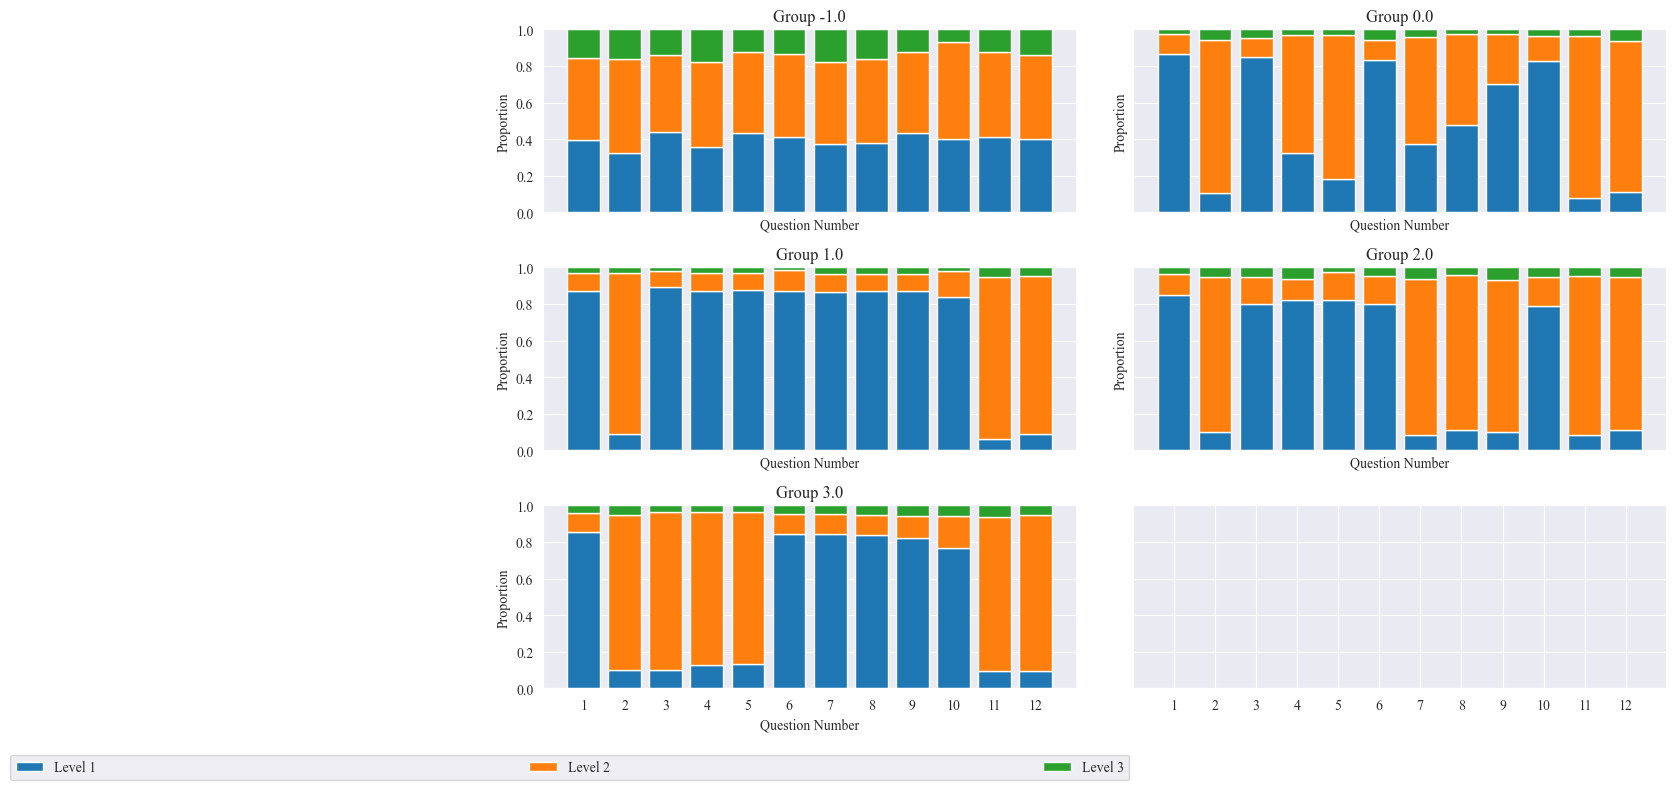

In [669]:



def difficulty_proportions(series_lists, levels=(1, 2, 3), n_questions=12):
    """
    series_lists: pandas Series，每個元素是一個 difficulty_level 的 list
    回傳：一個 dict，key 為難度等級，value 為長度 n_questions 的比例陣列
    """
    # 建立矩陣 (num_samples, n_questions)
    matrix = np.array([lst[:n_questions] for lst in series_lists], dtype=float)
    # 每題非 nan 的樣本數
    valid_counts = np.sum(~np.isnan(matrix), axis=0)
    props = {}
    for lvl in levels:
        # 計算該等級出現次數，再除以 valid_counts
        props[lvl] = np.sum(matrix == lvl, axis=0) / valid_counts
    return props


# 1. 計算每組的難度分佈比例
grouped = long_data.groupby('experiment_mode')['difficulty_level']
diff_props = {
    mode: difficulty_proportions(series)
    for mode, series in grouped
}

# 2. 畫圖：3x2 子圖，每組一張堆疊長條圖
fig, axs = plt.subplots(3, 2, figsize=(12, 8), sharex=True, sharey=True)
axs = axs.flatten()
x = np.arange(1, 13)  # 題號 1–12
levels = (1, 2, 3)

for i, (mode, props) in enumerate(diff_props.items()):
    ax = axs[i]
    bottom = np.zeros_like(x, dtype=float)
    for lvl in levels:
        ax.bar(x, props[lvl], bottom=bottom, label=f'Level {lvl}')
        bottom += props[lvl]
    ax.set_title(f'Group {mode}')
    ax.set_xticks(x)
    ax.set_xlabel('Question Number')
    ax.set_ylabel('Proportion')
    ax.set_ylim(0, 1)
    ax.grid(True)

# 第 1 個子圖加圖例


ax.legend(bbox_to_anchor=(-1, -0.5, 2.1, 2), loc='lower right', ncol=3, mode="expand", borderaxespad=0.)
plt.tight_layout()
plt.show()

In [670]:

for qid in range(12):
    long_data[f'q_{qid + 1}'] = long_data['question_id'].apply(lambda x: x[qid])
    long_data[f'q_{qid + 1}_corr'] = long_data['is_correct'].apply(lambda x: x[qid])

for i in [-1, 0, 1, 2, 3]:
    for qid in range(12):
        print(long_data[long_data['experiment_mode'] == i][f'q_{qid + 1}'].mode(dropna=True))
        long_data[f'q_{qid + 1}_mode'] = long_data[long_data['experiment_mode'] == i][f'q_{qid + 1}'].mode(dropna=True)[
            0]

long_data['all_mode'] = True

for qid in [0, 1, 5, 9, 10, 11]:
    mask = long_data[f'q_{qid + 1}'] == long_data[f'q_{qid + 1}_mode']
    long_data['all_mode'] &= mask

pd.crosstab(long_data['all_mode'], long_data['experiment_mode'])

long_data.info()

0    8089296296394280065
Name: q_1, dtype: int64
0   -5263639425820740356
Name: q_2, dtype: int64
0   -3286862775113972652
1   -1814475752912975980
2     -64832241296138289
Name: q_3, dtype: int64
0   -7369177682332275959
1   -6483910601239614890
2   -5860573598566964719
3   -1783125651226257124
Name: q_4, dtype: int64
0   -8408181528959204575
1   -7496469158512335533
2   -7344397578912061824
3   -6478614013474030721
4   -6338958442625568423
5   -3458772762941540163
6   -2866980091008926192
7   -1897899015581030178
8    8707461698589525409
9    8893987461296528841
Name: q_5, dtype: int64
0   -4217406752547553545
1    1998860331416304206
Name: q_6, dtype: int64
0   -3772869253171254520
Name: q_7, dtype: int64
0   -4524941626087692560
Name: q_8, dtype: int64
0    -6571346986088568924
1    -4517907049497146504
2    -2245225665317859563
3    -1897899015581030178
4     -981099135222065856
5     -330318186611364493
6     1971923763742939229
7     3311741167550650476
8     5709007776101919275

In [671]:
# did analyze on q1 to q10 and q2 to q11, q12
import statsmodels.formula as fml
import statsmodels.formula.api as smf


def did_analyze(df: pd.DataFrame, baseline: int, target: list):
    recode_dict = {f'q_{target[0]}_corr': 0, f'q_{target[1]}_corr': 1}
    df = df.melt(id_vars=['user_id', 'section_id', 'experiment_mode'],
                 value_vars=[f'q_{target[0]}_corr', f'q_{target[1]}_corr'],
                 var_name='time_binary',
                 value_name='corr'
                 )
    df['time_binary'] = df['time_binary'].apply(lambda x: recode_dict[x])
    formula = (
        f'corr ~ time_binary * '
        f'C(experiment_mode, Treatment(reference={baseline}))'
    )
    model = smf.ols(formula, data=df).fit()
    print(model.summary())

    return model


model = did_analyze(long_data.query('all_mode == True'), baseline=1, target=[1, 10])


                            OLS Regression Results                            
Dep. Variable:                   corr   R-squared:                       0.046
Model:                            OLS   Adj. R-squared:                  0.036
Method:                 Least Squares   F-statistic:                     4.434
Date:                Tue, 12 Aug 2025   Prob (F-statistic):           7.92e-05
Time:                        11:23:12   Log-Likelihood:                 12.315
No. Observations:                 650   AIC:                            -8.631
Df Residuals:                     642   BIC:                             27.19
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                                                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

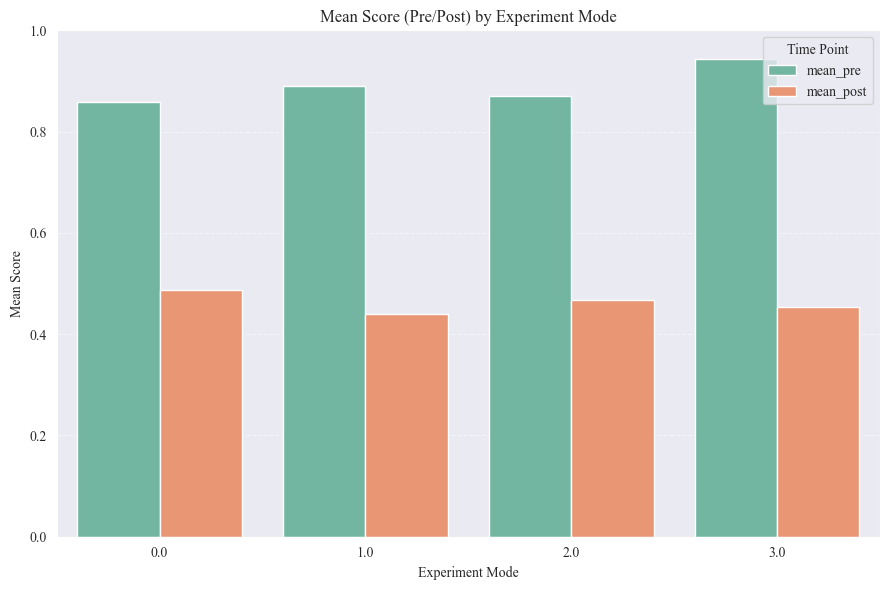

In [672]:

target = [3, 11]
summary_df = (
    long_data.query('all_mode == True')
    .groupby('experiment_mode')
    .agg(
        mean_pre=(f'q_{target[0]}_corr', 'mean'),
        mean_post=(f'q_{target[1]}_corr', 'mean'),
        std_pre=(f'q_{target[0]}_corr', 'std'),
        std_post=(f'q_{target[1]}_corr', 'std')
    )
    .reset_index()
)

df_plot = summary_df.melt(
    id_vars='experiment_mode',
    value_vars=['mean_pre', 'mean_post'],
    var_name='time_point',
    value_name='mean_score'
)

# 畫 grouped bar chart
plt.figure(figsize=(9, 6))

# 畫圖時以 experiment_mode 為 x 軸，time_point 為 hue（也就是 pre/post）
import seaborn as sns

sns.barplot(
    data=df_plot,
    x='experiment_mode',
    y='mean_score',
    hue='time_point',
    palette='Set2'
)

plt.title("Mean Score (Pre/Post) by Experiment Mode")
plt.xlabel("Experiment Mode")
plt.ylabel("Mean Score")
plt.ylim(0, 1)  # 根據你的 mean 值調整
plt.legend(title='Time Point')
plt.grid(True, axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


In [673]:
# import control sequences

control_seqs = pd.read_csv('../data/raw/question_sequence.csv')

recode_dict = {
    'control':0,
    'treatment1':1,
    'treatment2':2,
    'treatment3':3,
    }

section_dict = dict(zip(df_question.section_name,df_question.section_id))
rev_section_dict = dict(zip(df_question.section_id,df_question.section_name))

control_seqs['section_id'] = control_seqs.section_name_113_2.map(section_dict)
control_seqs['experiment_mode'] = control_seqs.sequence.map(recode_dict)
control_seqs['search_key'] = control_seqs.apply(lambda row: str(row['section_id'])+'_'+ str(row['experiment_mode']),axis = 1)
control_seqs['control_seq'] = control_seqs.apply(lambda row:np.array([row[f'Q{i+1}'] for i in range(12)]),axis = 1)


In [674]:
control_seqs.head()

,Unnamed: 0,sequence,publisher,section_name,book_volume_name,publisher_name_113_2,section_name_113_2,book_volume_name_113_2,Q1,Q2,...,Q7,Q8,Q9,Q10,Q11,Q12,section_id,experiment_mode,search_key,control_seq
0,0,control,康軒國小,3 容積,五下112,康軒國小,3 容積,五下113,69113588992878618,-75308616834142435,...,-1908360932417219092,-2348804092072956357,4649250512404957905,5948577754904052468,-4358907609513604648,-7361052562344121223,-3545039493898610459,0,-3545039493898610459_0,"[69113588992878618, -75308616834142435, -53711..."
1,1,treatment1,康軒國小,3 容積,五下112,康軒國小,3 容積,五下113,69113588992878618,-75308616834142435,...,4334620487126035177,5108527915460688310,-1288720951380365417,5948577754904052468,-4358907609513604648,-7361052562344121223,-3545039493898610459,1,-3545039493898610459_1,"[69113588992878618, -75308616834142435, -23488..."
2,2,treatment2,康軒國小,3 容積,五下112,康軒國小,3 容積,五下113,69113588992878618,-75308616834142435,...,-3202230148646485972,-1908360932417219092,-8594155001789108421,5948577754904052468,-4358907609513604648,-7361052562344121223,-3545039493898610459,2,-3545039493898610459_2,"[69113588992878618, -75308616834142435, -23488..."
3,3,treatment3,康軒國小,3 容積,五下112,康軒國小,3 容積,五下113,69113588992878618,-75308616834142435,...,-2348804092072956357,-5371107019222777434,4649250512404957905,5948577754904052468,-4358907609513604648,-7361052562344121223,-3545039493898610459,3,-3545039493898610459_3,"[69113588992878618, -75308616834142435, -32022..."
4,0,control,康軒國小,9 時間的乘除,五下112,康軒國小,9 時間的乘除,五下113,520497830035904533,-2091250926218676150,...,-2307309825203258326,-4398838213214723618,4054464459422027015,2596504183669148612,3305360628776648069,-2670908083034426001,-3525338262485141936,0,-3525338262485141936_0,"[520497830035904533, -2091250926218676150, 174..."


In [675]:
experiment_data = long_data.query('experiment_mode != -1')
experiment_data.loc[:,'12_question_id'] = experiment_data['question_id'].apply(lambda x : x[:12])
experiment_data.loc[:,'search_key'] = experiment_data.apply(lambda row: str(row['section_id'])+'_'+ str(int(row['experiment_mode'])),axis = 1)

/var/folders/n9/jhsz5r6d6cvctky31mq3pnfr0000gn/T/ipykernel_25636/874510696.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  experiment_data.loc[:,'12_question_id'] = experiment_data['question_id'].apply(lambda x : x[:12])
/var/folders/n9/jhsz5r6d6cvctky31mq3pnfr0000gn/T/ipykernel_25636/874510696.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  experiment_data.loc[:,'search_key'] = experiment_data.apply(lambda row: str(row['section_id'])+'_'+ str(int(row['experiment_mode'])),axis = 1)


In [676]:

seq_dict = dict(zip(control_seqs.search_key,control_seqs.control_seq))



experiment_data['seq_valid'] = experiment_data.apply(lambda row:
                                                     np.array_equal(row['12_question_id'],seq_dict.get(row['search_key'])),axis = 1)
experiment_data['control_seq'] = experiment_data['search_key'].apply(lambda  skey:seq_dict.get(skey))


/var/folders/n9/jhsz5r6d6cvctky31mq3pnfr0000gn/T/ipykernel_25636/2871953063.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  experiment_data['seq_valid'] = experiment_data.apply(lambda row:
/var/folders/n9/jhsz5r6d6cvctky31mq3pnfr0000gn/T/ipykernel_25636/2871953063.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  experiment_data['control_seq'] = experiment_data['search_key'].apply(lambda  skey:seq_dict.get(skey))


In [677]:
experiment_data.create_time.apply(lambda x: x[0]).max()

Timestamp('2025-06-03 15:22:25')

In [678]:
rawdata

,user_id,session_id,gamecharacter_id,section_id,difficulty_level,is_correct,question_id,experiment_index,experiment_mode,create_time,q_len,create_at
0,-9220875092377949261,1,5420362116578998711,-247801341597882458,"[1, 2, 1, 2, 2]","[1, 1, 1, 0, 0]","[5986642740406154097, -1814475752912975980, 57...","[0, 0, 0, 0, 0]",0.0,"[2025-05-11 16:02:08, 2025-05-11 16:02:22, 202...",5,2025-05-11 16:02:08
1,-9220875092377949261,1,5420362116578998711,-735516376314681185,"[1, 2, 1, 1, 2, 2]","[1, 1, 1, 1, 1, 1]","[-14184471799432209, -4284811783960796428, -44...","[None, None, None, None, None, None]",0.0,"[2025-05-11 16:03:27, 2025-05-11 16:03:45, 202...",6,2025-05-11 16:03:27
11,-9215975131138636025,1,2806305522055252713,-9042528178512436726,"[1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2]","[1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[4680614589130178593, -1794677401750382001, -1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",1.0,"[2025-04-14 02:15:35, 2025-04-14 02:16:33, 202...",12,2025-04-14 02:15:35
12,-9215975131138636025,1,2806305522055252713,-247801341597882458,"[1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2]","[1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0]","[5986642740406154097, -1814475752912975980, 57...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",1.0,"[2025-04-14 02:01:31, 2025-04-14 02:03:13, 202...",11,2025-04-14 02:01:31
13,-9215975131138636025,1,2806305522055252713,145845299402454255,"[1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2]","[0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0]","[69113588992878618, -75308616834142435, -23488...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",1.0,"[2025-04-14 02:11:22, 2025-04-14 02:11:51, 202...",12,2025-04-14 02:11:22
...,...,...,...,...,...,...,...,...,...,...,...,...
128847,9213230166089222050,1,-1214835533697186768,7685579370828672563,"[1, 2, 1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1, 1, 1]","[-73508931510711594, -2339810603879002153, -59...","[1, 1, 1, 1, 1, 1, 1, 1, 1]",1.0,"[2025-05-03 18:51:32, 2025-05-03 18:51:49, 202...",9,2025-05-03 18:51:32
128848,9214147213309223475,1,-9195780468874175699,6084119510007883763,"[3, 3, 3, 3]","[0, 1, 1, 0]","[-4163235174349309515, -2528918832815624142, 1...","[3, 3, 3, 3]",3.0,"[2025-05-29 13:57:07, 2025-05-29 14:01:48, 202...",4,2025-05-29 13:57:07
128849,9214147213309223475,1,-9195780468874175699,-9042528178512436726,[2],[1],[6807502004705403551],[3],3.0,[2025-05-29 13:58:14],1,2025-05-29 13:58:14
128893,9223087356083948458,1,8730877631531542123,6084119510007883763,"[1, 2, 3, 1, 1, 2, 1]","[1, 0, 0, 0, 1, 0, 1]","[-2451827522348391739, -7175100385077046464, 2...","[2, 2, 2, 2, 2, 2, 2]",2.0,"[2025-05-29 13:53:54, 2025-05-29 13:55:54, 202...",7,2025-05-29 13:53:54


In [679]:
# make new df
raw_experiment_data = rawdata.query('experiment_mode != -1')
raw_experiment_data.loc[:, '12_question_id'] = raw_experiment_data['question_id'].apply(lambda x: x[:12])
raw_experiment_data.loc[:, 'search_key'] = raw_experiment_data.apply(
    lambda row: str(row['section_id']) + '_' + str(int(row['experiment_mode'])), axis=1)

seq_dict = dict(zip(control_seqs.search_key, control_seqs.control_seq))

raw_experiment_data['seq_valid'] = raw_experiment_data.apply(lambda row:
                                                     np.array_equal(row['12_question_id'],
                                                                    seq_dict.get(row['search_key'])), axis=1)
raw_experiment_data['control_seq'] = raw_experiment_data['search_key'].apply(lambda skey: seq_dict.get(skey))

for qid in range(12):
    raw_experiment_data[f'q_{qid + 1}'] = raw_experiment_data['question_id'].apply(lambda x: x[qid] if qid < len(x) else None)
    raw_experiment_data[f'q_{qid + 1}_corr'] = raw_experiment_data['is_correct'].apply(lambda x: x[qid] if qid < len(x) else None)


def is_equal(l_lis,r_lis,q_len):
    if r_lis is None:
        return False
    itern = min(len(l_lis),q_len)
    for i in range(itern):
        if l_lis[i] != r_lis[i]:
            return False
    return True
for i in range(1,13):
    raw_experiment_data[f'seq_valid_less{i}inc'] = raw_experiment_data.apply(lambda row: is_equal(row['12_question_id'],row['control_seq'],i) ,axis = 1)

/var/folders/n9/jhsz5r6d6cvctky31mq3pnfr0000gn/T/ipykernel_25636/151151534.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_experiment_data.loc[:, '12_question_id'] = raw_experiment_data['question_id'].apply(lambda x: x[:12])
/var/folders/n9/jhsz5r6d6cvctky31mq3pnfr0000gn/T/ipykernel_25636/151151534.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  raw_experiment_data.loc[:, 'search_key'] = raw_experiment_data.apply(
/var/folders/n9/jhsz5r6d6cvctky31mq3pnfr0000gn/T/ipykernel_25636/151151534.py:9: S

Text(0.5, 0, 'Question NO.')

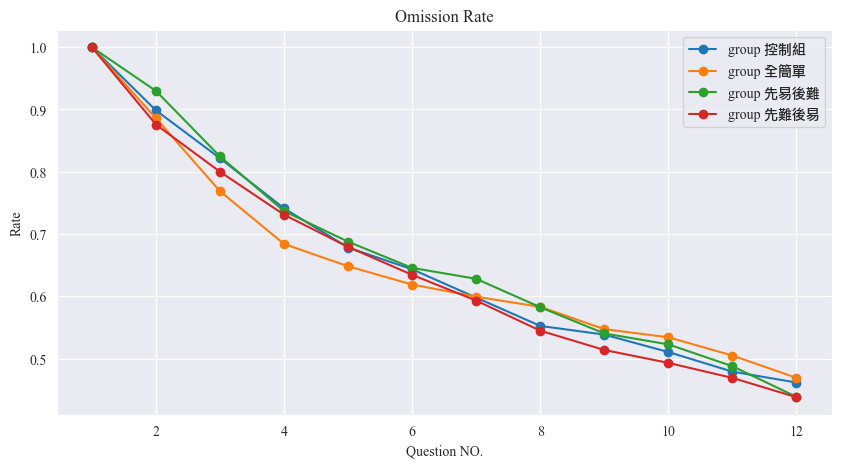

In [680]:
raw_experiment_data_f12corr = raw_experiment_data.query('seq_valid_less12inc == True')
plt.figure(figsize=(10,5))
for g in [0,1,2,3]:
    plt.plot([i+1 for i in range(12)],[len(raw_experiment_data_f12corr.query(f'q_len >= {i+1} and experiment_mode == {g}').index)/len(raw_experiment_data_f12corr.query(f'experiment_mode == {g}').index) for i in range(12)],label = f'group {group_translate[g]}',marker = 'o')
plt.legend()
plt.title('Omission Rate')
plt.ylabel('Rate')
plt.xlabel('Question NO.')

In [681]:
valid_experiment_data = experiment_data.query('seq_valid == True')


In [708]:
valid_experiment_data.value_counts('experiment_mode')

experiment_mode
1.0    144
0.0    132
3.0    127
2.0    125
Name: count, dtype: int64

# make stack bar plot

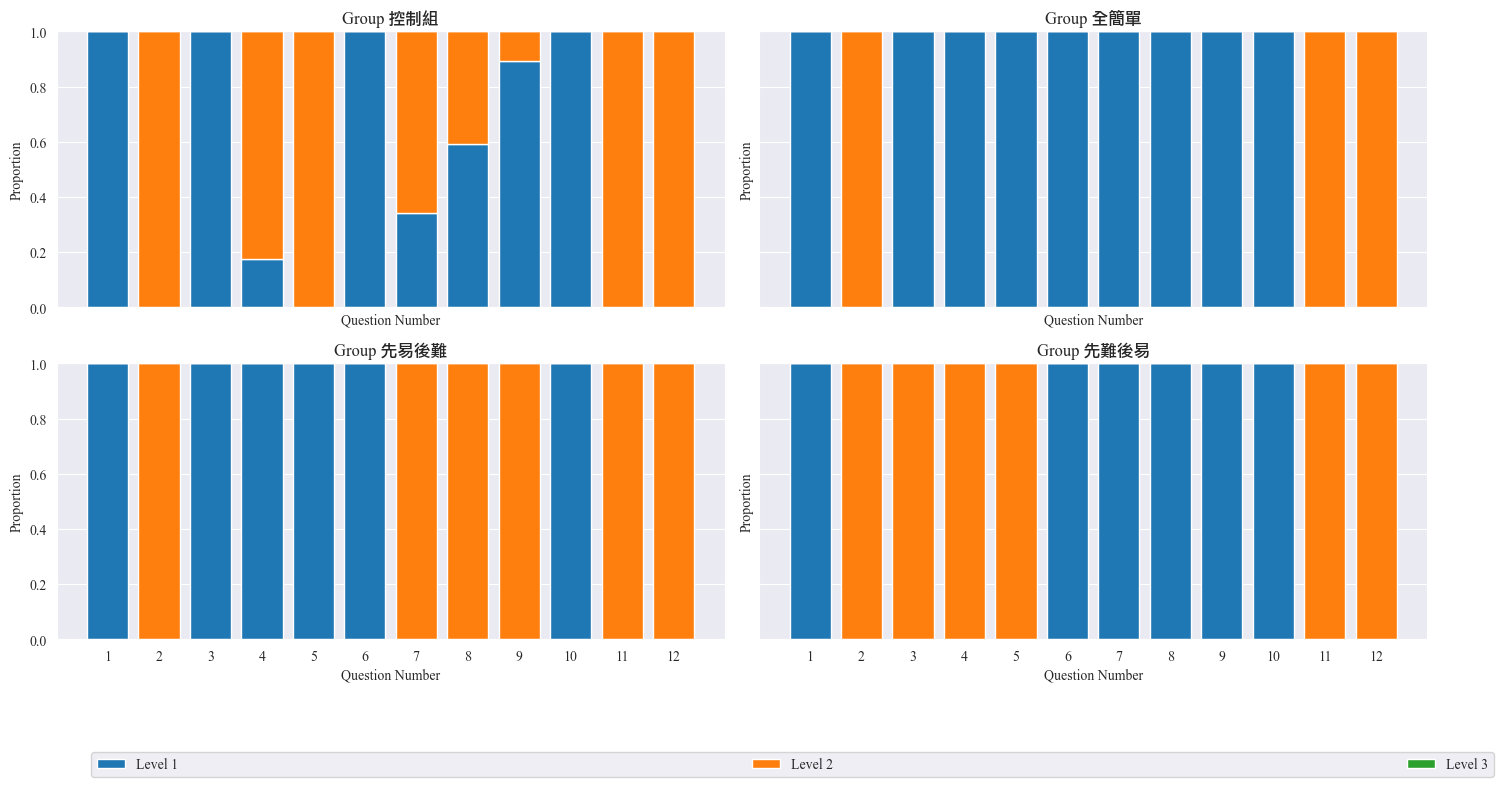

In [682]:
# 1. 計算每組的難度分佈比例
grouped = valid_experiment_data.groupby('experiment_mode')['difficulty_level']
diff_props = {
    mode: difficulty_proportions(series)
    for mode, series in grouped
}

# 2. 畫圖：3x2 子圖，每組一張堆疊長條圖
fig, axs = plt.subplots(2, 2, figsize=(15, 8), sharex=True, sharey=True)
axs = axs.flatten()
x = np.arange(1, 13)  # 題號 1–12
levels = (1, 2, 3)

for i, (mode, props) in enumerate(diff_props.items()):
    ax = axs[i]
    bottom = np.zeros_like(x, dtype=float)
    for lvl in levels:
        ax.bar(x, props[lvl], bottom=bottom, label=f'Level {lvl}')
        bottom += props[lvl]
    ax.set_title(f'Group {group_translate[mode]}')
    ax.set_xticks(x)
    ax.set_xlabel('Question Number')
    ax.set_ylabel('Proportion')
    ax.set_ylim(0, 1)
    ax.grid(True)

plt.legend(bbox_to_anchor=(-1, -0.5, 2.1, 2), loc='lower right', ncol=3, mode="expand", borderaxespad=0.)
plt.tight_layout()
plt.show()

# DID

In [683]:
# make long data to do did
valid_experiment_data_no0 = valid_experiment_data.query('experiment_mode != 0')
print('_________________________________________ q1 q10_________________________________________ \n')
did_1_10 = did_analyze(valid_experiment_data_no0,baseline=1,target=[1,10])
print('_________________________________________ q2 q11_________________________________________  \n')
did_2_11 = did_analyze(valid_experiment_data_no0,baseline=1,target=[2,11])
print('_________________________________________ q2 q12_________________________________________  \n')
did_2_12 = did_analyze(valid_experiment_data_no0,baseline=1,target=[2,12])


_________________________________________ q1 q10_________________________________________ 

                            OLS Regression Results                            
Dep. Variable:                   corr   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.033
Date:                Tue, 12 Aug 2025   Prob (F-statistic):              0.397
Time:                        11:23:14   Log-Likelihood:                -212.24
No. Observations:                 792   AIC:                             436.5
Df Residuals:                     786   BIC:                             464.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                                                    coef    std err          t      P>|t|      [0.025 

In [684]:
# q12 correct rate

def correct_rate_analyze(df: pd.DataFrame, baseline: int, target: int):
    df = df.melt(id_vars=['user_id', 'section_id', 'experiment_mode'],
                 value_vars=[f'q_{target}_corr'],
                 var_name='time_binary',
                 value_name='corr'
                 )
    formula = (
        f'corr ~ C(experiment_mode, Treatment(reference={baseline}))'
    )
    model = smf.ols(formula, data=df).fit()
    print(model.summary())
    return model


print('_________________________________________ q1_________________________________________  \n')
corr_1 = correct_rate_analyze(valid_experiment_data_no0,baseline=1,target=1)
print('_________________________________________ q2_________________________________________  \n')
corr_2 = correct_rate_analyze(valid_experiment_data_no0,baseline=1,target=2)
print('_________________________________________ q10_________________________________________  \n')
corr_10 = correct_rate_analyze(valid_experiment_data_no0,baseline=1,target=10)
print('_________________________________________ q11_________________________________________  \n')
corr_11 = correct_rate_analyze(valid_experiment_data_no0,baseline=1,target=11)
print('_________________________________________ q12_________________________________________  \n')
corr_12 = correct_rate_analyze(valid_experiment_data_no0,baseline=1,target=12)



_________________________________________ q1_________________________________________  

                            OLS Regression Results                            
Dep. Variable:                   corr   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.4247
Date:                Tue, 12 Aug 2025   Prob (F-statistic):              0.654
Time:                        11:23:14   Log-Likelihood:                -67.818
No. Observations:                 396   AIC:                             141.6
Df Residuals:                     393   BIC:                             153.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---

In [685]:
for i in [10,11,12]:
    print(f"----------------------------q {i}-------------------------------")
    formula = (f'q_{i}_corr ~ C(experiment_mode, Treatment(reference=1)) + q_1_corr + q_2_corr ')
    model = smf.ols(formula, data=valid_experiment_data_no0).fit()
    print(model.summary())

----------------------------q 10-------------------------------
                            OLS Regression Results                            
Dep. Variable:              q_10_corr   R-squared:                       0.027
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     2.713
Date:                Tue, 12 Aug 2025   Prob (F-statistic):             0.0297
Time:                        11:23:14   Log-Likelihood:                -132.95
No. Observations:                 396   AIC:                             275.9
Df Residuals:                     391   BIC:                             295.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

In [686]:
print('_________________________________________ q1_________________________________________  \n')
corr_1 = correct_rate_analyze(raw_experiment_data_f12corr,baseline=1,target=1)
print('_________________________________________ q2_________________________________________  \n')
corr_2 = correct_rate_analyze(raw_experiment_data_f12corr,baseline=1,target=2)

_________________________________________ q1_________________________________________  

                            OLS Regression Results                            
Dep. Variable:                   corr   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.848
Date:                Tue, 12 Aug 2025   Prob (F-statistic):              0.137
Time:                        11:23:14   Log-Likelihood:                -410.65
No. Observations:                1168   AIC:                             829.3
Df Residuals:                    1164   BIC:                             849.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---

In [687]:
valid_experiment_data_no0_merge23 = valid_experiment_data.query('experiment_mode != 0')
valid_experiment_data_no0_merge23['experiment_mode'] = valid_experiment_data_no0_merge23['experiment_mode'].apply(lambda x : 0 if x == 1 else 1)
print('_________________________________________ q1 q10_________________________________________ \n')
did_1_10 = did_analyze(valid_experiment_data_no0_merge23,baseline=0,target=[1,10])
print('_________________________________________ q2 q11_________________________________________  \n')
did_2_11 = did_analyze(valid_experiment_data_no0_merge23,baseline=0,target=[2,11])
print('_________________________________________ q2 q12_________________________________________  \n')
did_2_12 = did_analyze(valid_experiment_data_no0_merge23,baseline=0,target=[2,12])

_________________________________________ q1 q10_________________________________________ 

                            OLS Regression Results                            
Dep. Variable:                   corr   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     1.494
Date:                Tue, 12 Aug 2025   Prob (F-statistic):              0.215
Time:                        11:23:14   Log-Likelihood:                -212.58
No. Observations:                 792   AIC:                             433.2
Df Residuals:                     788   BIC:                             451.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                                                  coef    std err          t      P>|t|      [0.025   

/var/folders/n9/jhsz5r6d6cvctky31mq3pnfr0000gn/T/ipykernel_25636/321654591.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_experiment_data_no0_merge23['experiment_mode'] = valid_experiment_data_no0_merge23['experiment_mode'].apply(lambda x : 0 if x == 1 else 1)


In [688]:
print('_________________________________________ q1_________________________________________  \n')
corr_1 = correct_rate_analyze(valid_experiment_data_no0_merge23,baseline=0,target=1)
print('_________________________________________ q2_________________________________________  \n')
corr_2 = correct_rate_analyze(valid_experiment_data_no0_merge23,baseline=0,target=2)
print('_________________________________________ q10_________________________________________  \n')
corr_10 = correct_rate_analyze(valid_experiment_data_no0_merge23,baseline=0,target=10)
print('_________________________________________ q11_________________________________________  \n')
corr_11 = correct_rate_analyze(valid_experiment_data_no0_merge23,baseline=0,target=11)
print('_________________________________________ q12_________________________________________  \n')
corr_12 = correct_rate_analyze(valid_experiment_data_no0_merge23,baseline=0,target=12)

_________________________________________ q1_________________________________________  

                            OLS Regression Results                            
Dep. Variable:                   corr   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.1564
Date:                Tue, 12 Aug 2025   Prob (F-statistic):              0.693
Time:                        11:23:14   Log-Likelihood:                -68.166
No. Observations:                 396   AIC:                             140.3
Df Residuals:                     394   BIC:                             148.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-----

# engagement analyze

In [689]:
# pre-experiment correct rate data
question_correct_rate = df_user_ans.groupby('question_id').agg({
    'is_correct':['mean','count']

})
question_correct_rate.head()

is_correct      
                           mean count
question_id                          
-9223361055765457616       0.75     4
-9223292678947070792        1.0     2
-9223243849218151857        1.0     3
-9223242614800200375        1.0     1
-9223221247853814224        1.0     2

In [690]:
valid_experiment_data

,user_id,session_id,gamecharacter_id,section_id,difficulty_level,is_correct,question_id,experiment_index,experiment_mode,create_time,...,q_8_mode,q_9_mode,q_10_mode,q_11_mode,q_12_mode,all_mode,12_question_id,search_key,seq_valid,control_seq
11,-9215975131138636025,1,2806305522055252713,-9042528178512436726,"[1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2]","[1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[4680614589130178593, -1794677401750382001, -1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",1.0,"[2025-04-14 02:15:35, 2025-04-14 02:16:33, 202...",...,5709007776101919275,7246391716930387719,8707461698589525409,831253084160088526,-5263639425820740356,False,"[4680614589130178593, -1794677401750382001, -1...",-9042528178512436726_1,True,"[4680614589130178593, -1794677401750382001, -1..."
84,-9188426539812515988,1,-5801951509393644373,-247801341597882458,"[1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[5986642740406154097, -1814475752912975980, 57...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0.0,"[2025-04-14 10:47:59, 2025-04-14 10:49:02, 202...",...,5709007776101919275,7246391716930387719,8707461698589525409,831253084160088526,-5263639425820740356,True,"[5986642740406154097, -1814475752912975980, 57...",-247801341597882458_0,True,"[5986642740406154097, -1814475752912975980, 57..."
188,-9167949940408139786,1,4032858197546372387,-9042528178512436726,"[1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[4680614589130178593, -1794677401750382001, -1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",1.0,"[2025-04-29 18:55:30, 2025-04-29 18:56:22, 202...",...,5709007776101919275,7246391716930387719,8707461698589525409,831253084160088526,-5263639425820740356,False,"[4680614589130178593, -1794677401750382001, -1...",-9042528178512436726_1,True,"[4680614589130178593, -1794677401750382001, -1..."
218,-9163699005485264463,1,-4186062678303545318,-247801341597882458,"[1, 2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2]","[1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1]","[5986642740406154097, -1814475752912975980, 57...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]",0.0,"[2025-04-14 11:03:55, 2025-04-14 11:04:31, 202...",...,5709007776101919275,7246391716930387719,8707461698589525409,831253084160088526,-5263639425820740356,True,"[5986642740406154097, -1814475752912975980, 57...",-247801341597882458_0,True,"[5986642740406154097, -1814475752912975980, 57..."
378,-9151607106764900077,1,9032576541211706029,-247801341597882458,"[1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2]","[1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0]","[5986642740406154097, -1814475752912975980, 48...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]",3.0,"[2025-04-11 09:40:22, 2025-04-11 09:40:38, 202...",...,5709007776101919275,7246391716930387719,8707461698589525409,831253084160088526,-5263639425820740356,True,"[5986642740406154097, -1814475752912975980, 48...",-247801341597882458_3,True,"[5986642740406154097, -1814475752912975980, 48..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128261,9108879207689892857,1,-1048901914282302686,-247801341597882458,"[1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2]","[1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]","[5986642740406154097, -1814475752912975980, 48...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]",3.0,"[2025-04-14 11:26:45, 2025-04-14 11:29:51, 202...",...,5709007776101919275,7246391716930387719,8707461698589525409,831253084160088526,-5263639425820740356,True,"[5986642740406154097, -1814475752912975980, 48...",-247801341597882458_3,True,"[5986642740406154097, -1814475752912975980, 48..."
128444,9131331099697333526,1,2927560399374800867,-247801341597882458,"[1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2]","[1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1]","[5986642740406154097, -1814475752912975980, 48...","[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]",3.0,"[2025-04-13 21:41:32, 2025-04-13 21:42:17, 202...",...,5709007776101919275,7246391716930387719,8707461698589525409,831253084160088526,-5263639425820740356,True,"[5986642740406154097, -1814475752912975980, 48...",-2478013415978

In [691]:
#valid_experiment_data['delta_time'] = valid_experiment_data['create_time'].apply(lambda lis : [(lis[i+1] - lis[i])for i in range(lis)])
valid_experiment_data.loc[:,'delta_time'] = valid_experiment_data.loc[:,'create_time'].apply(lambda lis : [(lis[i+1] - lis[i]).total_seconds() for i in range(len(lis)-1)])
valid_experiment_data.loc[:,'accumulate_time'] = valid_experiment_data.loc[:,'create_time'].apply(lambda lis : [(lis[i+1] - lis[0]).total_seconds() for i in range(len(lis)-1)])

/var/folders/n9/jhsz5r6d6cvctky31mq3pnfr0000gn/T/ipykernel_25636/1320826900.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_experiment_data.loc[:,'delta_time'] = valid_experiment_data.loc[:,'create_time'].apply(lambda lis : [(lis[i+1] - lis[i]).total_seconds() for i in range(len(lis)-1)])
/var/folders/n9/jhsz5r6d6cvctky31mq3pnfr0000gn/T/ipykernel_25636/1320826900.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_experiment_data.loc[:,'accumulate_time'] = valid_experiment_data.loc[:,'create

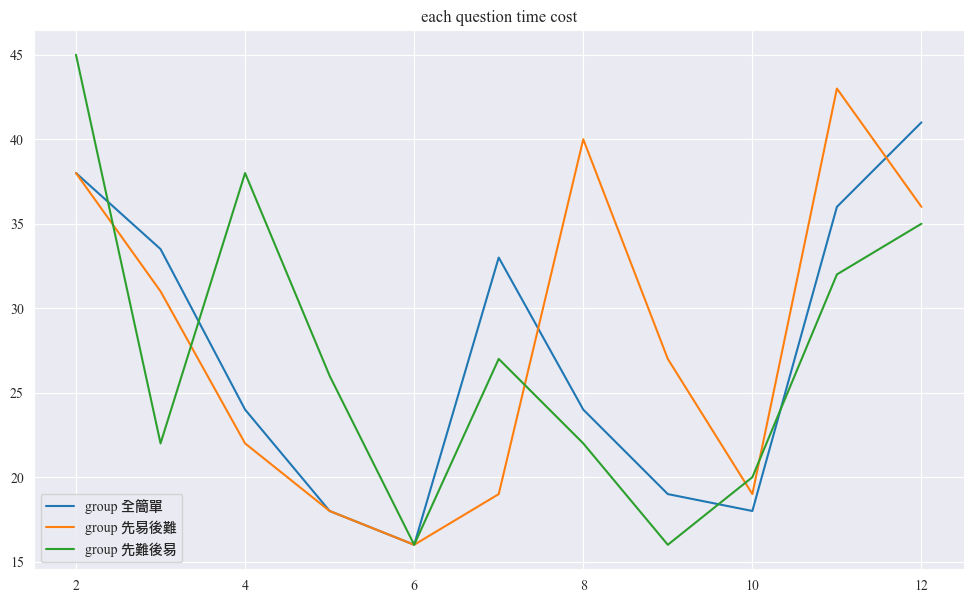

In [692]:
def anstime_analyze(df:pd.DataFrame,groups:list,q_len,col:str):
    results = []
    for group in groups:
        temp = []
        df_g = df.query(f'experiment_mode == {group}')
        matrix = df_g[f'{col}'].values
        for li in matrix:
            temp.append(li[:11])
        results.append(np.nanmedian(temp,axis = 0))
    return results

qtime = anstime_analyze(valid_experiment_data,groups = [0,1,2,3],col = 'delta_time',q_len=12)
# plot results

plt.figure(figsize=(12,7))
for g,lis in zip([1,2,3],qtime[1:4]):
    plt.plot([i+2 for i in range(11)],lis,label = f'group {group_translate[g]}')
plt.title('each question time cost')
plt.legend()



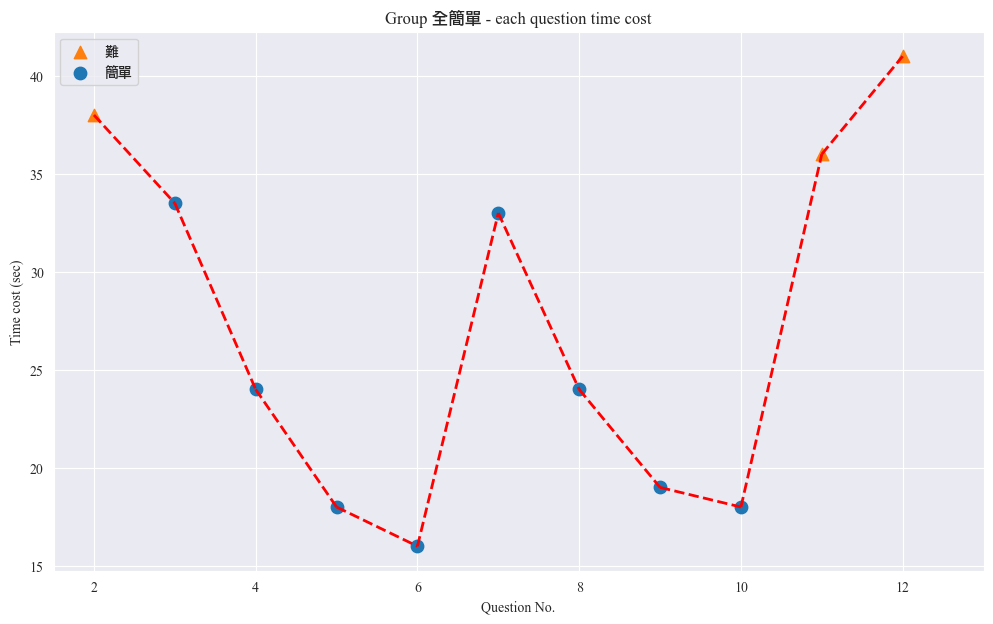

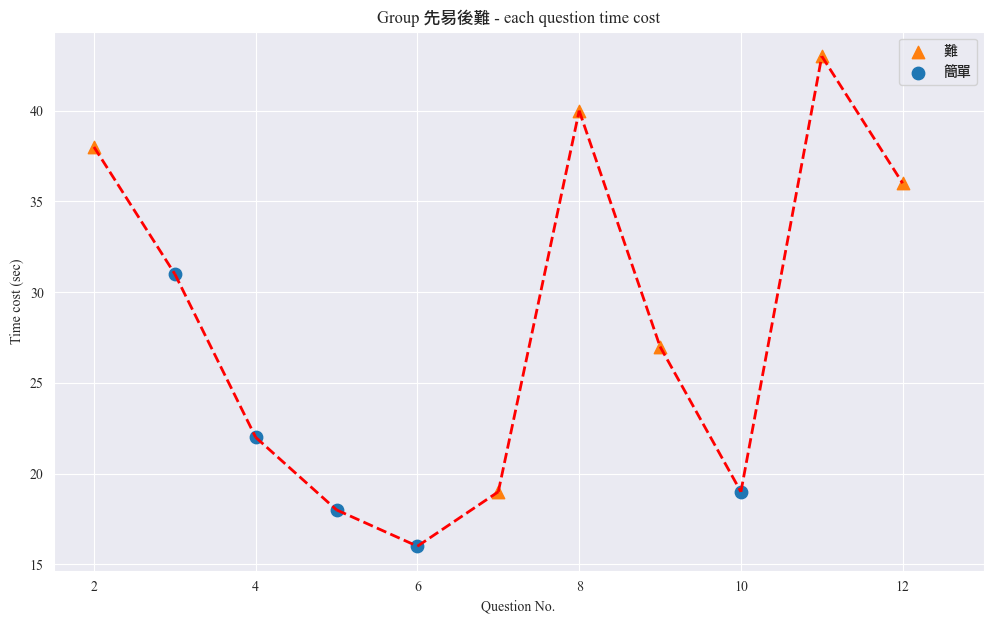

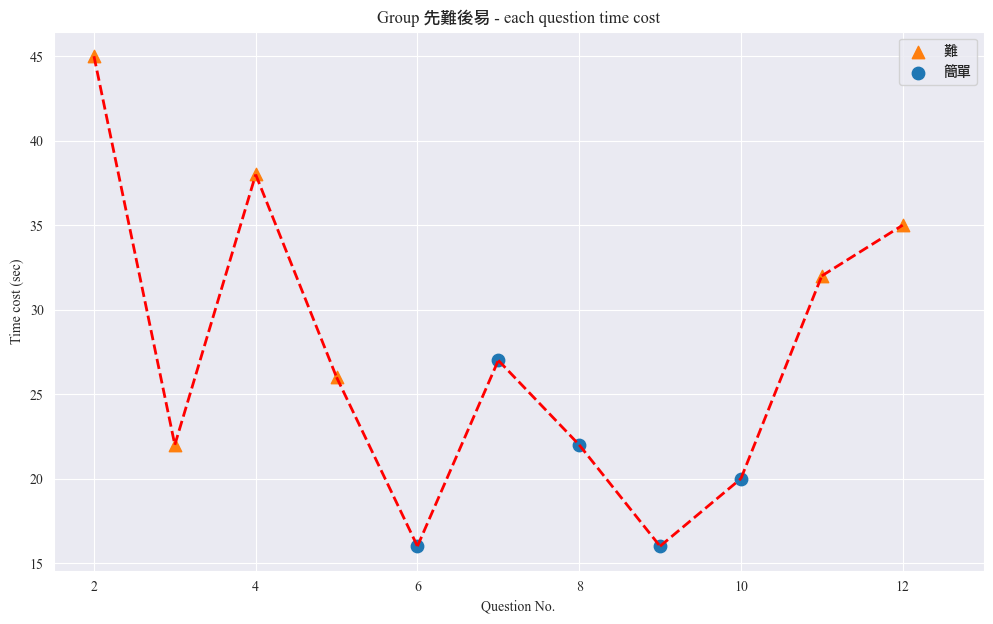

In [693]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import numpy as np

# 假資料（假設 qtime 已存在）
# qtime = [None, np.random.rand(12), np.random.rand(12), np.random.rand(12)]
# group_translate = {1: "A", 2: "B", 3: "C"}

marker_seqs = {
    1: ['^', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', '^', '^', '^'],
    2: ['^', 'o', 'o', 'o', 'o', '^', '^', '^', 'o', '^', '^', '^'],
    3: ['^', '^', '^', '^', 'o', 'o', 'o', 'o', 'o', '^', '^', '^']
}

line_color = 'red'  # 紅色線

for g, lis in zip([1, 2, 3], qtime[1:4]):
    x = np.arange(2, 2 + len(lis))
    y = lis

    fig, ax = plt.subplots(figsize=(12, 7))

    # 正確建立線段資料
    points = np.column_stack([x, y])
    segments = np.stack([points[:-1], points[1:]], axis=1)  # (n-1, 2, 2)
    lc = LineCollection(segments, colors=line_color, linewidths=2, linestyles='--')  # 紅色虛線
    ax.add_collection(lc)

    # 畫每個點
    scatter_handles = {}  # 用來避免重複圖例
    for xi, yi, m in zip(x, y, marker_seqs[g]):
        if m == 'o':
            color = 'C0'
            label = '簡單'
        elif m == '^':
            color = 'C1'
            label = '難'
        else:
            color = 'black'
            label = None

        sc = ax.scatter(xi, yi, marker=m, color=color, s=80,
                        label=label if label not in scatter_handles else None)
        if label and label not in scatter_handles:
            scatter_handles[label] = sc

    ax.set_title(f'Group {group_translate[g]} - each question time cost')
    ax.set_xlim([1.5, 13])
    ax.legend()
    ax.set_xlabel("Question No.")
    ax.set_ylabel("Time cost (sec)")
    plt.show()


Text(0, 0.5, 'Time cost (sec)')

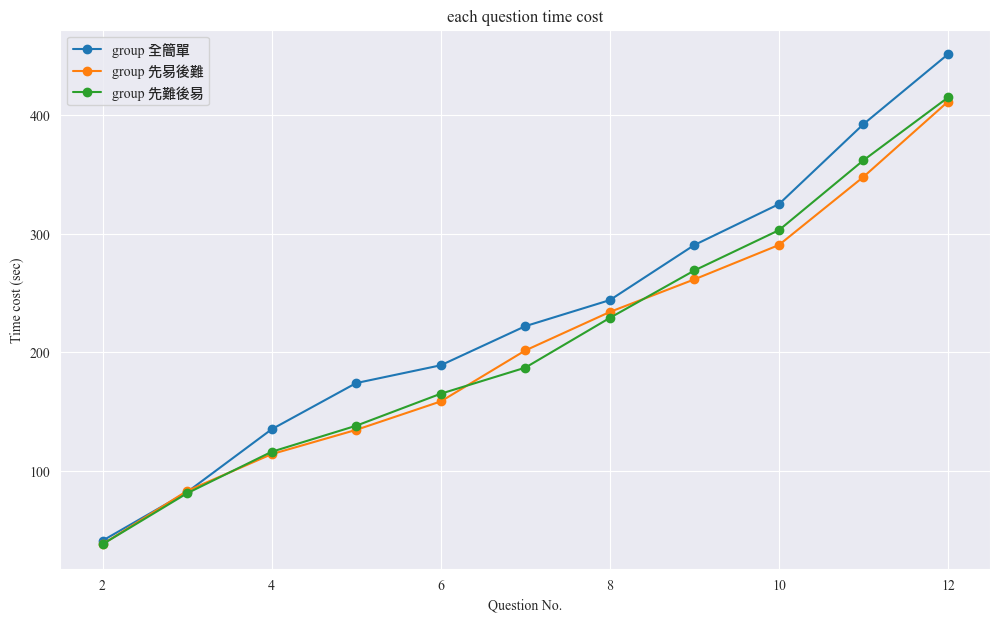

In [694]:
acctime = anstime_analyze(valid_experiment_data,groups = [0,1,2,3],col = 'accumulate_time',q_len=12)

# plot results
plt.figure(figsize=(12,7))
for g,lis in zip([1,2,3],acctime):
    plt.plot([i+2 for i in range(11)],lis,label = f'group {group_translate[g]}',marker = "o")
plt.title('each question time cost')
plt.legend()
plt.xlabel('Question No.')
plt.ylabel('Time cost (sec)')

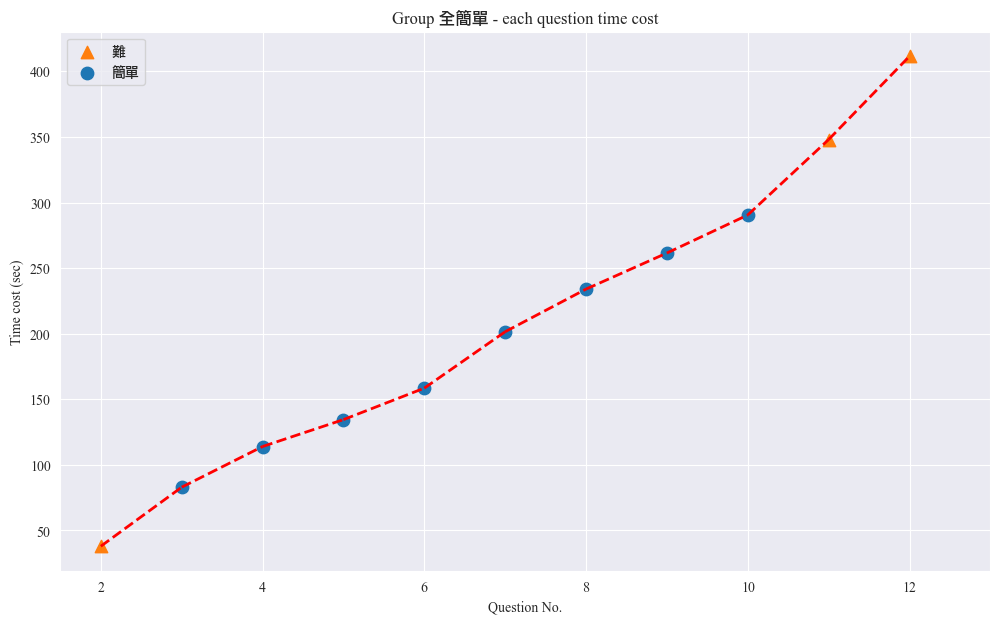

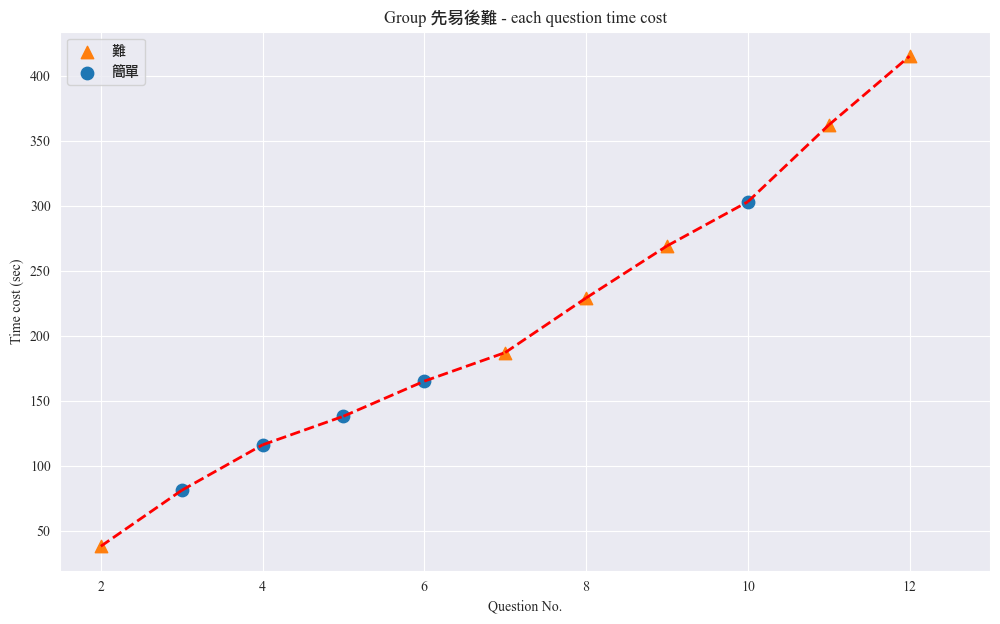

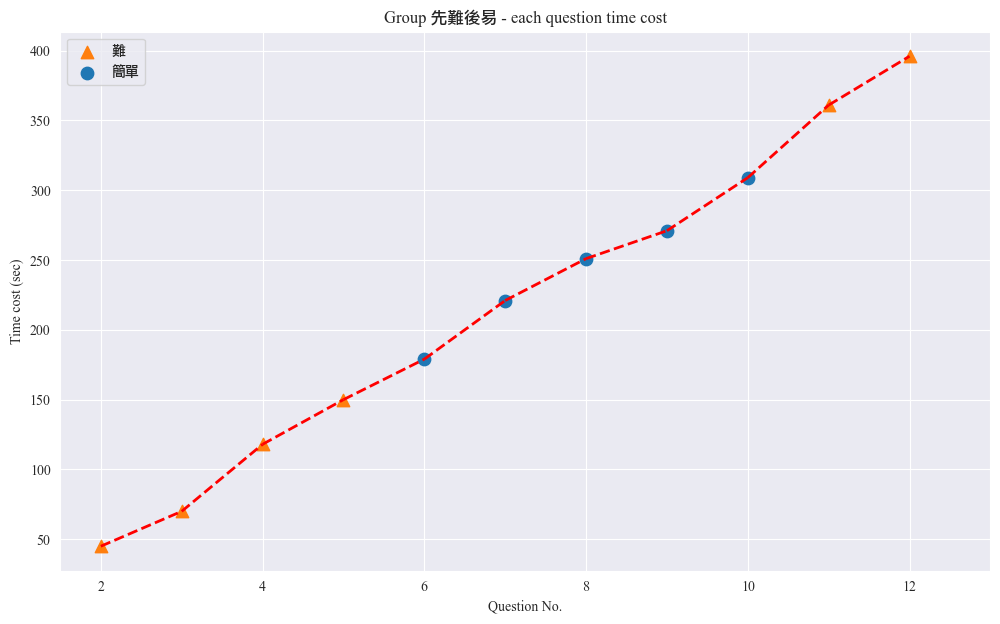

In [695]:
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import numpy as np

# 假資料（假設 qtime 已存在）
# qtime = [None, np.random.rand(12), np.random.rand(12), np.random.rand(12)]
# group_translate = {1: "A", 2: "B", 3: "C"}

marker_seqs = {
    1: ['^', 'o', 'o', 'o', 'o', 'o', 'o', 'o', 'o', '^', '^', '^'],
    2: ['^', 'o', 'o', 'o', 'o', '^', '^', '^', 'o', '^', '^', '^'],
    3: ['^', '^', '^', '^', 'o', 'o', 'o', 'o', 'o', '^', '^', '^']
}

line_color = 'red'  # 紅色線

for g, lis in zip([1, 2, 3], acctime[1:4]):
    x = np.arange(2, 2 + len(lis))
    y = lis

    fig, ax = plt.subplots(figsize=(12, 7))

    # 正確建立線段資料
    points = np.column_stack([x, y])
    segments = np.stack([points[:-1], points[1:]], axis=1)  # (n-1, 2, 2)
    lc = LineCollection(segments, colors=line_color, linewidths=2, linestyles='--')  # 紅色虛線
    ax.add_collection(lc)

    # 畫每個點
    scatter_handles = {}  # 用來避免重複圖例
    for xi, yi, m in zip(x, y, marker_seqs[g]):
        if m == 'o':
            color = 'C0'
            label = '簡單'
        elif m == '^':
            color = 'C1'
            label = '難'
        else:
            color = 'black'
            label = None

        sc = ax.scatter(xi, yi, marker=m, color=color, s=80,
                        label=label if label not in scatter_handles else None)
        if label and label not in scatter_handles:
            scatter_handles[label] = sc

    ax.set_title(f'Group {group_translate[g]} - each question time cost')
    ax.set_xlim([1.5, 13])
    ax.legend()
    ax.set_xlabel("Question No.")
    ax.set_ylabel("Time cost (sec)")
    plt.show()


In [696]:
# quntile regression on qtime 10,11,12
import statsmodels.formula.api as smf


for qn in [10,11,12]:
    data = {'time_cost' : valid_experiment_data['delta_time'].apply(lambda x: x[qn-2]), 'group': valid_experiment_data['experiment_mode']}
    mod = smf.quantreg(f'time_cost ~ C(group,Treatment(reference=1))',data = data)
    res = mod.fit(q = 0.5)
    print(f'\n\n\n----------------------------Q {qn}-------------------------\n\n\n')
    print(res.summary())




----------------------------Q 10-------------------------



                         QuantReg Regression Results                          
Dep. Variable:              time_cost   Pseudo R-squared:             0.002424
Model:                       QuantReg   Bandwidth:                       7.308
Method:                 Least Squares   Sparsity:                        24.43
Date:                Tue, 12 Aug 2025   No. Observations:                  528
Time:                        11:23:16   Df Residuals:                      524
                                        Df Model:                            3
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                  18.0000      1.018     17.681      0.000      16.000      20.000
C(group, Treatment(reference=1))[T.0.0]     3.0000      1.4

In [697]:
data = {'time_cost' : valid_experiment_data['accumulate_time'].apply(lambda x: x[10]), 'group': valid_experiment_data['experiment_mode']}
mod = smf.quantreg(f'time_cost ~ C(group,Treatment(reference=1))',data = data)
res = mod.fit(q = 0.5)
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:              time_cost   Pseudo R-squared:             0.003149
Model:                       QuantReg   Bandwidth:                       122.4
Method:                 Least Squares   Sparsity:                        515.3
Date:                Tue, 12 Aug 2025   No. Observations:                  528
Time:                        11:23:16   Df Residuals:                      524
                                        Df Model:                            3
                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------
Intercept                                 416.9436     21.469     19.421      0.000     374.768     459.119
C(group, Treatment(reference=1))[T.0.0]    35.0383     31.044      1.129      0.260     -25.948      96.025
C(group, Treatm

In [698]:
valid_experiment_data.value_counts('experiment_mode')

experiment_mode
1.0    144
0.0    132
3.0    127
2.0    125
Name: count, dtype: int64

x# seq correct analyze

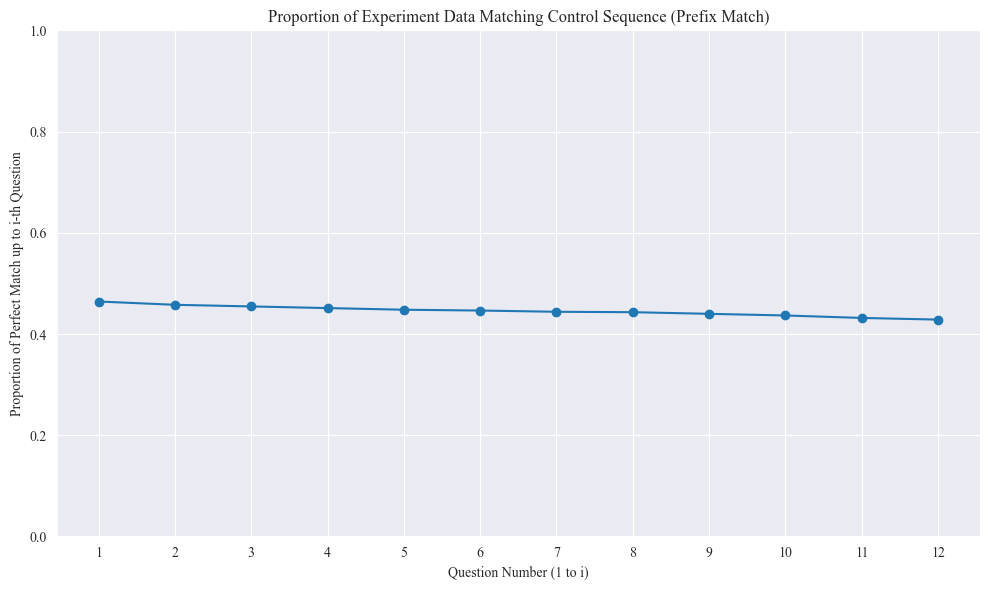

[np.float64(0.4642857142857143), np.float64(0.4577922077922078), np.float64(0.45454545454545453), np.float64(0.4512987012987013), np.float64(0.44805194805194803), np.float64(0.44642857142857145), np.float64(0.4439935064935065), np.float64(0.4431818181818182), np.float64(0.43993506493506496), np.float64(0.4366883116883117), np.float64(0.4318181818181818), np.float64(0.42857142857142855)]


In [699]:
import matplotlib.pyplot as plt

# 確保有以下變數
# experiment_data: dataframe，含欄位 '12_question_id', 'search_key'
# seq_dict: dict，key 為 search_key，value 為正確的 sequence（長度 12 的 array）

# 儲存每一題符合比例
match_ratios = []

# 遍歷 1~12 題
for i in range(1, 13):
    def is_prefix_match(row):
        control_seq = seq_dict.get(row['search_key'])
        if control_seq is None:
            return False
        return np.array_equal(row['12_question_id'][:i], control_seq[:i])

    matched = experiment_data.apply(is_prefix_match, axis=1)
    ratio = matched.mean()  # 符合者比例
    match_ratios.append(ratio)

# 畫圖
plt.figure(figsize=(10, 6))
plt.plot(range(1, 13), match_ratios, marker='o', linestyle='-')
plt.xticks(range(1, 13))
plt.xlabel('Question Number (1 to i)')
plt.ylabel('Proportion of Perfect Match up to i-th Question')
plt.title('Proportion of Experiment Data Matching Control Sequence (Prefix Match)')
plt.grid(True)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()
print(match_ratios)

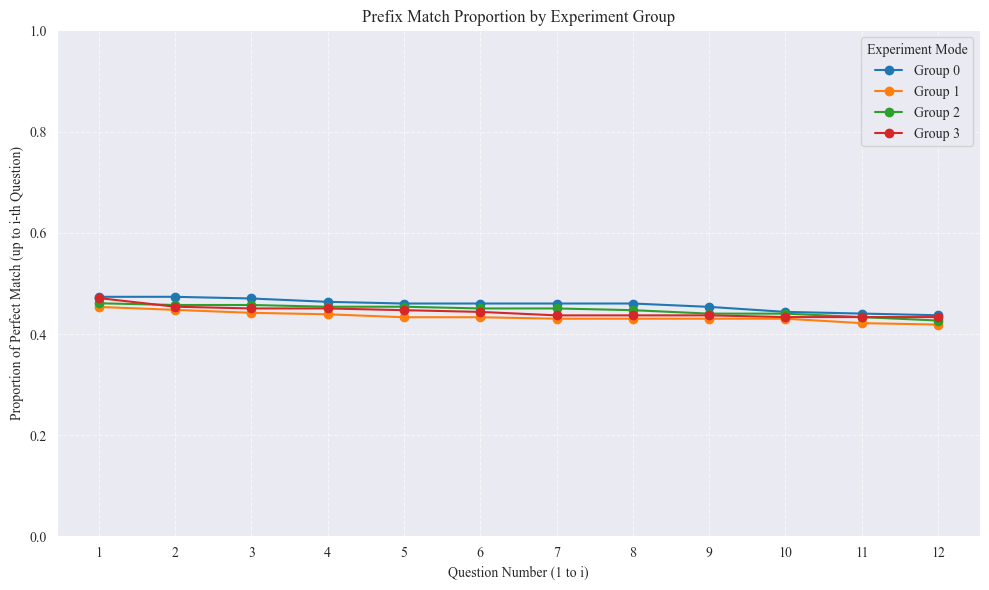

In [700]:
import matplotlib.pyplot as plt

# 取得實驗組別（排除 -1）
experiment_groups = experiment_data['experiment_mode'].unique()
experiment_groups = sorted([int(g) for g in experiment_groups if g != -1])

# 建立 dict 儲存每組比例序列
group_match_ratios = {g: [] for g in experiment_groups}

for i in range(1, 13):  # 題號 1~12
    for g in experiment_groups:
        df_g = experiment_data[experiment_data['experiment_mode'] == g]
        def is_prefix_match(row):
            control_seq = seq_dict.get(row['search_key'])
            if control_seq is None:
                return False
            return np.array_equal(row['12_question_id'][:i], control_seq[:i])
        matched = df_g.apply(is_prefix_match, axis=1)
        ratio = matched.mean()
        group_match_ratios[g].append(ratio)

# 畫圖
plt.figure(figsize=(10, 6))
x = range(1, 13)
for g in experiment_groups:
    plt.plot(x, group_match_ratios[g], marker='o', label=f'Group {g}')

plt.xticks(x)
plt.xlabel('Question Number (1 to i)')
plt.ylabel('Proportion of Perfect Match (up to i-th Question)')
plt.title('Prefix Match Proportion by Experiment Group')
plt.grid(True, linestyle='--', alpha=0.6)
plt.ylim(0, 1)
plt.legend(title='Experiment Mode')
plt.tight_layout()
plt.show()


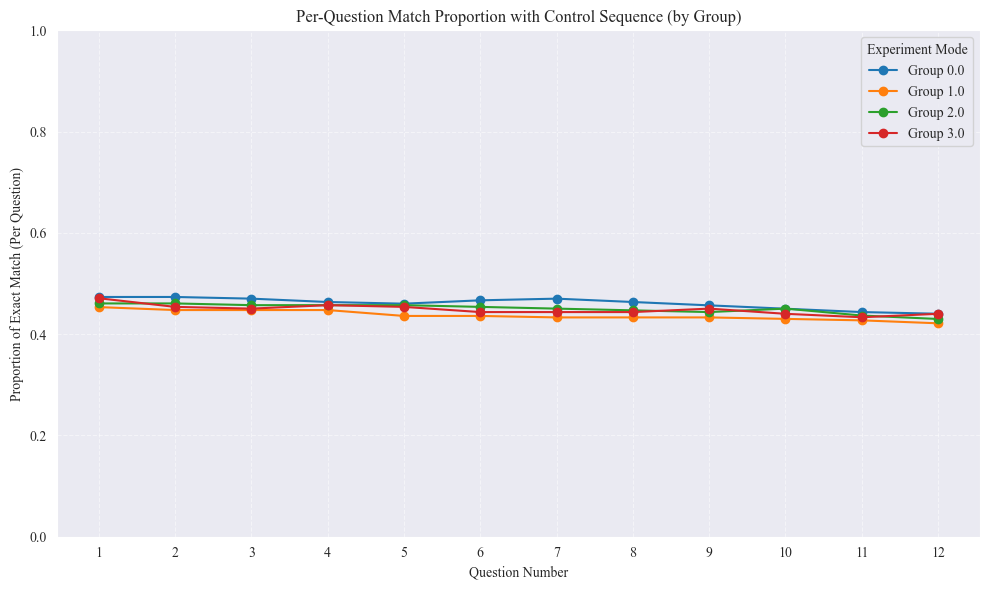

In [701]:
import matplotlib.pyplot as plt

# 設定組別（可依實際資料而定）
experiment_groups = sorted(experiment_data['experiment_mode'].dropna().unique())

# 儲存各組別在每一題的符合比例
group_question_match = {g: [] for g in experiment_groups}

# 對每一題 (0-indexed for Python)
for i in range(12):  # 題號 1~12
    for g in experiment_groups:
        df_g = experiment_data[experiment_data['experiment_mode'] == g]

        def is_q_match(row):
            control_seq = seq_dict.get(row['search_key'])
            if control_seq is None:
                return False
            return row['12_question_id'][i] == control_seq[i]

        matched = df_g.apply(is_q_match, axis=1)
        match_ratio = matched.mean()
        group_question_match[g].append(match_ratio)

# 畫圖
plt.figure(figsize=(10, 6))
x = list(range(1, 13))  # 題號

for g in experiment_groups:
    plt.plot(x, group_question_match[g], marker='o', label=f'Group {g}')

plt.xticks(x)
plt.xlabel('Question Number')
plt.ylabel('Proportion of Exact Match (Per Question)')
plt.title('Per-Question Match Proportion with Control Sequence (by Group)')
plt.ylim(0, 1)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Experiment Mode')
plt.tight_layout()
plt.show()


In [702]:
print(experiment_data.count())
print(experiment_data.seq_valid.value_counts())

user_id             1232
session_id          1232
gamecharacter_id    1232
section_id          1232
difficulty_level    1232
is_correct          1232
question_id         1232
experiment_index    1232
experiment_mode     1232
create_time         1232
q_len               1232
create_at           1232
q_1                 1232
q_1_corr            1232
q_2                 1232
q_2_corr            1232
q_3                 1232
q_3_corr            1232
q_4                 1232
q_4_corr            1232
q_5                 1232
q_5_corr            1232
q_6                 1232
q_6_corr            1232
q_7                 1232
q_7_corr            1232
q_8                 1232
q_8_corr            1232
q_9                 1232
q_9_corr            1232
q_10                1232
q_10_corr           1232
q_11                1232
q_11_corr           1232
q_12                1232
q_12_corr           1232
q_1_mode            1232
q_2_mode            1232
q_3_mode            1232
q_4_mode            1232


In [703]:
exp_long = long_data[long_data['experiment_mode'].isin([0,1,2,3])]
non_exp_long = long_data[~long_data['experiment_mode'].isin([0,1,2,3])]

In [704]:
long_data[long_data['section_id'] == -9042528178512436726][['experiment_mode','question_id','create_time']]

,experiment_mode,question_id,create_time
11,1.0,"[4680614589130178593, -1794677401750382001, -1...","[2025-04-14 02:15:35, 2025-04-14 02:16:33, 202..."
188,1.0,"[4680614589130178593, -1794677401750382001, -1...","[2025-04-29 18:55:30, 2025-04-29 18:56:22, 202..."
909,0.0,"[4680614589130178593, -1794677401750382001, 38...","[2025-04-22 14:40:48, 2025-04-22 14:44:09, 202..."
1922,3.0,"[4680614589130178593, -1794677401750382001, -6...","[2025-04-13 20:48:21, 2025-04-13 20:49:37, 202..."
2384,1.0,"[4680614589130178593, -1794677401750382001, -1...","[2025-04-25 20:56:34, 2025-04-25 20:57:33, 202..."
...,...,...,...
125232,3.0,"[4680614589130178593, -1794677401750382001, -6...","[2025-04-17 20:47:51, 2025-04-17 20:48:40, 202..."
125411,0.0,"[4680614589130178593, -1794677401750382001, 38...","[2025-04-17 08:05:36, 2025-04-17 08:06:05, 202..."
125671,0.0,"[4680614589130178593, -1794677401750382001, 38...","[2025-04-15 15:38:44, 2025-04-15 15:40:53, 202..."
127641,2.0,"[4680614589130178593, -1794677401750382001, -1...","[2025-05-23 11:38:53, 2025-05-23 11:39:14, 202..."


In [705]:
control_seqs

,Unnamed: 0,sequence,publisher,section_name,book_volume_name,publisher_name_113_2,section_name_113_2,book_volume_name_113_2,Q1,Q2,...,Q7,Q8,Q9,Q10,Q11,Q12,section_id,experiment_mode,search_key,control_seq
0,0,control,康軒國小,3 容積,五下112,康軒國小,3 容積,五下113,69113588992878618,-75308616834142435,...,-1908360932417219092,-2348804092072956357,4649250512404957905,5948577754904052468,-4358907609513604648,-7361052562344121223,-3545039493898610459,0,-3545039493898610459_0,"[69113588992878618, -75308616834142435, -53711..."
1,1,treatment1,康軒國小,3 容積,五下112,康軒國小,3 容積,五下113,69113588992878618,-75308616834142435,...,4334620487126035177,5108527915460688310,-1288720951380365417,5948577754904052468,-4358907609513604648,-7361052562344121223,-3545039493898610459,1,-3545039493898610459_1,"[69113588992878618, -75308616834142435, -23488..."
2,2,treatment2,康軒國小,3 容積,五下112,康軒國小,3 容積,五下113,69113588992878618,-75308616834142435,...,-3202230148646485972,-1908360932417219092,-8594155001789108421,5948577754904052468,-4358907609513604648,-7361052562344121223,-3545039493898610459,2,-3545039493898610459_2,"[69113588992878618, -75308616834142435, -23488..."
3,3,treatment3,康軒國小,3 容積,五下112,康軒國小,3 容積,五下113,69113588992878618,-75308616834142435,...,-2348804092072956357,-5371107019222777434,4649250512404957905,5948577754904052468,-4358907609513604648,-7361052562344121223,-3545039493898610459,3,-3545039493898610459_3,"[69113588992878618, -75308616834142435, -32022..."
4,0,control,康軒國小,9 時間的乘除,五下112,康軒國小,9 時間的乘除,五下113,520497830035904533,-2091250926218676150,...,-2307309825203258326,-4398838213214723618,4054464459422027015,2596504183669148612,3305360628776648069,-2670908083034426001,-3525338262485141936,0,-3525338262485141936_0,"[520497830035904533, -2091250926218676150, 174..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,3,treatment3,康軒國小,5 十進位結構,五下112,康軒國小,5 十進位結構,五下113,4680614589130178593,-1794677401750382001,...,-1113156898056861262,3847776141460785270,-3678348170036989128,1637307589124347792,5581172194395314614,8231509399365486276,-9042528178512436726,3,-9042528178512436726_3,"[4680614589130178593, -1794677401750382001, -6..."
60,0,control,康軒國小,1 體積,五下112,康軒國小,1 體積,五下113,5986642740406154097,-1814475752912975980,...,4816520945223989067,7246391716930387719,5709007776101919275,8707461698589525409,831253084160088526,-5263639425820740356,-247801341597882458,0,-247801341597882458_0,"[5986642740406154097, -1814475752912975980, 57..."
61,1,treatment1,康軒國小,1 體積,五下112,康軒國小,1 體積,五下113,5986642740406154097,-1814475752912975980,...,-9013829383219240211,5556066601331488933,-3286862775113972652,8707461698589525409,831253084160088526,-5263639425820740356,-247801341597882458,1,-247801341597882458_1,"[5986642740406154097, -1814475752912975980, 57..."
62,2,treatment2,康軒國小,1 體積,五下112,康軒國小,1 體積,五下113,5986642740406154097,-1814475752912975980,...,4816520945223989067,-1025311054463154271,7479955377401805758,8707461698589525409,831253084160088526,-5263639425820740356,-247801341597882458,2,-247801341597882458_2,"[5986642740406154097, -1814475752912975980, 57..."


In [706]:
rev_section_dict[145845299402454255]

'3 容積'